In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
pd.set_option("display.max_rows", 10)

In [2]:
def standardize_figure(fig):
    fig.update_layout(font_size = 20,
                      margin=dict(l=50, r=50, b=0, t=1))

## Video 1: Intro to Classification

In [3]:
df = pd.read_csv("pay_status.csv")
df.head(5)

,Income,Debt,Status
0,6552.53,1170.93,Did Not Pay
1,7247.80,570.94,Did Not Pay
2,8074.38,422.67,Did Not Pay
3,5776.60,872.42,Did Not Pay
4,6297.35,887.56,Did Not Pay


In [4]:
df["Status"].value_counts()

Status
Paid           125
Did Not Pay    100
Name: count, dtype: int64

<Axes: xlabel='Income', ylabel='Debt'>

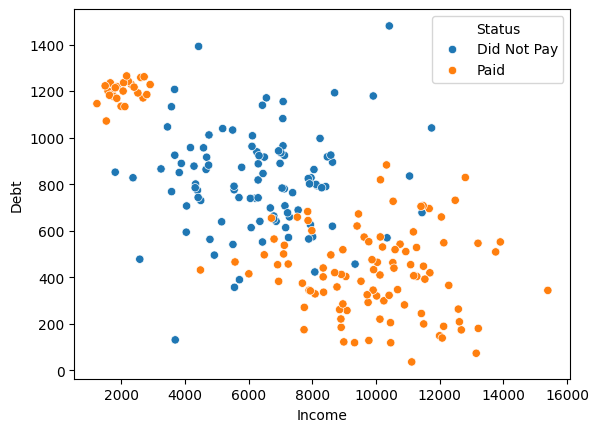

In [5]:
sns.scatterplot(data = df, x='Income', y='Debt', hue='Status')

## Video 2: Nearest Neighbors in sklearn

In [6]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1)

In [7]:
model.fit(df[['Income', 'Debt']], df['Status'])

,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [8]:
model.predict([[13000, 400]])

C:\Users\prove\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Paid'], dtype=object)

In [9]:
model.predict([[2000, 1200]])

C:\Users\prove\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Paid'], dtype=object)

In [10]:
def plot_decision_boundary(model, x, y):
    """This function plots the given two class model's decision boundaries over the x and y values provided"""
    sns_cmap = ListedColormap(np.array(sns.color_palette())[0:2, :])

    xx, yy = np.meshgrid(x, y)

    Z_string = model.predict(np.c_[xx.ravel(), yy.ravel()])
    categories, Z_int = np.unique(Z_string, return_inverse=True)
    Z_int = Z_int
    Z_int = Z_int.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z_int, cmap=sns_cmap)

C:\Users\prove\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


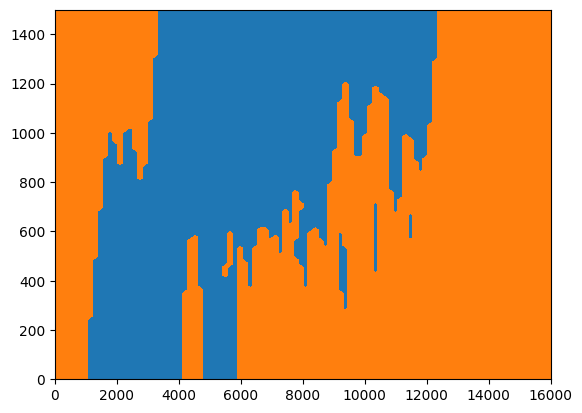

In [11]:
x_range = np.linspace(0, 16000, 100)
y_range = np.linspace(0, 1500, 100)
plot_decision_boundary(model, x_range, y_range)

## k Nearest Neighbors

In [12]:
# feel free to adjust n_neighbors to see how the model changes
model = KNeighborsClassifier(n_neighbors = 200)
model.fit(df[['Income', 'Debt']], df['Status'])

,n_neighbors,200
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


C:\Users\prove\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


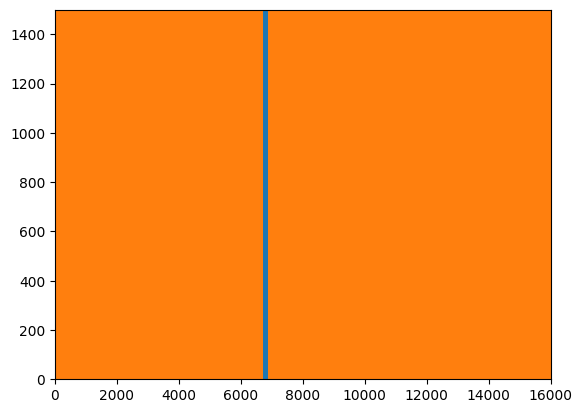

In [13]:
x_range = np.linspace(0, 16000, 100)
y_range = np.linspace(0, 1500, 100)
plot_decision_boundary(model, x_range, y_range)

In [14]:
df["y_hat"] = model.predict(df[["Income", "Debt"]])

In [15]:
df.iloc[0:5]

,Income,Debt,Status,y_hat
0,6552.53,1170.93,Did Not Pay,Paid
1,7247.80,570.94,Did Not Pay,Paid
2,8074.38,422.67,Did Not Pay,Paid
3,5776.60,872.42,Did Not Pay,Paid
4,6297.35,887.56,Did Not Pay,Paid


In [16]:
from sklearn.metrics import accuracy_score

def get_misclassification_rate_for_k(k):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(df[['Income', 'Debt']], df['Status'])
    return 1 - accuracy_score(model.predict(df[['Income', 'Debt']]), df["Status"])

In [17]:
ks = range(1, len(df))
errors = [get_misclassification_rate_for_k(k) for k in ks]
errors_and_ks = pd.DataFrame({'k': ks, 'Misclassification Rate': errors})

In [18]:
errors_and_ks

,k,Misclassification Rate
0,1,0.000000
1,2,0.062222
2,3,0.084444
3,4,0.075556
4,5,0.093333
...,...,...
219,220,0.444444
220,221,0.444444
221,222,0.444444
222,223,0.444444


In [19]:
errors_and_ks["-k"] = -errors_and_ks["k"]

In [20]:
import plotly.express as px


fig = px.line(errors_and_ks, x = "k", y = "Misclassification Rate")
standardize_figure(fig)
fig.show()


In [21]:
import plotly.express as px
fig = px.line(errors_and_ks, x = "-k", y = "Misclassification Rate")
standardize_figure(fig)
fig.show()


In [22]:
model = KNeighborsClassifier()
parameters_to_try = {'n_neighbors': np.array(range(1, len(df)))}

from sklearn.model_selection import GridSearchCV
model_finder = GridSearchCV(estimator = model,
                               param_grid = parameters_to_try,
                               scoring = "accuracy",
                               cv = 5)

In [ ]:
model_finder.fit(df[['Income', 'Debt']], df["Status"])

In [ ]:
model_finder.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [ ]:
model_finder.cv_results_['mean_test_score']

array([0.74666667, 0.75111111, 0.77333333, 0.76888889, 0.76444444,
       0.76888889, 0.76444444, 0.76      , 0.76      , 0.76      ,
       0.76      , 0.75555556, 0.76      , 0.76      , 0.76      ,
       0.75555556, 0.76888889, 0.74666667, 0.75555556, 0.74666667,
       0.73777778, 0.74666667, 0.75111111, 0.74666667, 0.75111111,
       0.74222222, 0.74222222, 0.74222222, 0.74222222, 0.73777778,
       0.72888889, 0.73333333, 0.72444444, 0.72      , 0.71555556,
       0.71555556, 0.72      , 0.72      , 0.72      , 0.71555556,
       0.71555556, 0.71555556, 0.71555556, 0.72      , 0.72      ,
       0.72444444, 0.72      , 0.72444444, 0.72444444, 0.72444444,
       0.72444444, 0.73777778, 0.73777778, 0.73777778, 0.73777778,
       0.73333333, 0.73777778, 0.72888889, 0.73777778, 0.73777778,
       0.73333333, 0.72888889, 0.73333333, 0.73333333, 0.73333333,
       0.72888889, 0.73333333, 0.73333333, 0.73333333, 0.73333333,
       0.73333333, 0.73333333, 0.73333333, 0.73333333, 0.73333

In [ ]:
len(df)

225

In [ ]:
gridsearch_output = pd.DataFrame({'CV accuracy': model_finder.cv_results_['mean_test_score'],
             'k': np.array(range(1, len(df)))})

In [ ]:
fig = px.line(gridsearch_output, x = "k", y = "CV accuracy")
standardize_figure(fig)
fig.show()
#fig.write_image("cv_accuracy_vs_k.png")

In [ ]:
gridsearch_output["-k"] = -gridsearch_output["k"]
gridsearch_output["CV Error"] = 1 - gridsearch_output["CV accuracy"]

In [ ]:
fig = px.line(gridsearch_output, x = "-k", y = "CV Error")
standardize_figure(fig)
fig.show()

In [ ]:
gridsearch_output

,CV accuracy,k,-k,CV Error
0,0.746667,1,-1,0.253333
1,0.751111,2,-2,0.248889
2,0.773333,3,-3,0.226667
3,0.768889,4,-4,0.231111
4,0.764444,5,-5,0.235556
...,...,...,...,...
219,NaN,220,-220,NaN
220,NaN,221,-221,NaN
221,NaN,222,-222,NaN
222,NaN,223,-223,NaN


In [ ]:
both_training_and_CV_errors = pd.merge(errors_and_ks.rename(columns = {"Misclassification Rate": "Training Error"}),
         gridsearch_output,
         left_on = "-k",
         right_on = "-k",
         how = "inner")
both_training_and_CV_errors

,k_x,Training Error,-k,CV accuracy,k_y,CV Error
0,1,0.000000,-1,0.746667,1,0.253333
1,2,0.062222,-2,0.751111,2,0.248889
2,3,0.084444,-3,0.773333,3,0.226667
3,4,0.075556,-4,0.768889,4,0.231111
4,5,0.093333,-5,0.764444,5,0.235556
...,...,...,...,...,...,...
219,220,0.444444,-220,NaN,220,NaN
220,221,0.444444,-221,NaN,221,NaN
221,222,0.444444,-222,NaN,222,NaN
222,223,0.444444,-223,NaN,223,NaN


In [ ]:
both_training_and_CV_errors["CV Error"]

,CV Error
0,0.253333
1,0.248889
2,0.226667
3,0.231111
4,0.235556
...,...
219,NaN
220,NaN
221,NaN
222,NaN


In [ ]:
fig = px.line(both_training_and_CV_errors, x = "-k", y = ["Training Error", "CV Error"])
standardize_figure(fig)
fig.update_layout(legend_title= "",
              legend=dict(
                x=0.05,
                y=0.05,
                bordercolor="Black",
               borderwidth=2))
fig.show()


In [ ]:
fig = px.line(both_training_and_CV_errors.iloc[0:40], x = "-k", y = ["Training Error", "CV Error"])
standardize_figure(fig)
fig.update_layout(legend_title= "",
              legend=dict(
                x=0.05,
                y=0.05,
                bordercolor="Black",
               borderwidth=2))
fig.show()

### predict_proba

In [ ]:
#np.random.seed(201)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 10)
model.fit(df[['Income', 'Debt']], df['Status'])

KNeighborsClassifier(n_neighbors=10)

In [ ]:
ten_random_rows = df[["Income", "Debt"]].iloc[[217, 70, 146, 211, 71, 23, 179, 163, 144, 157]]
ten_random_rows

,Income,Debt
217,2052.38,1200.14
70,5536.69,791.12
146,8349.86,335.78
211,2216.65,1242.31
71,2575.43,477.58
23,7275.85,659.38
179,7093.72,500.13
163,11278.11,403.40
144,6711.90,654.25
157,11084.64,454.15


In [ ]:
pd.DataFrame(model.predict(ten_random_rows[["Income", "Debt"]]),
             columns = ["prediction"])

,prediction
0,Paid
1,Did Not Pay
2,Paid
3,Paid
4,Paid
5,Did Not Pay
6,Did Not Pay
7,Paid
8,Did Not Pay
9,Paid


In [ ]:
model.predict_proba(ten_random_rows[["Income", "Debt"]])

array([[0. , 1. ],
       [0.9, 0.1],
       [0.3, 0.7],
       [0. , 1. ],
       [0.3, 0.7],
       [0.7, 0.3],
       [0.5, 0.5],
       [0. , 1. ],
       [0.6, 0.4],
       [0.1, 0.9]])

In [ ]:
pd.DataFrame(["Paid" if x else "Did Not Pay" for x in model.predict_proba(ten_random_rows[["Income", "Debt"]])[:, 1] >= 0.9],
             columns = ["prediction"])

,prediction
0,Paid
1,Did Not Pay
2,Did Not Pay
3,Paid
4,Did Not Pay
5,Did Not Pay
6,Did Not Pay
7,Paid
8,Did Not Pay
9,Paid


### Precision Recall Curves

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
def show_confusion_matrix_and_print_accuracy_and_recall(reality, predictions):
    cm = confusion_matrix(reality, predictions)
    sns.heatmap(cm, annot=True, fmt = "d", cmap = "Blues", annot_kws={"size": 20}, cbar = False)
    plt.ylabel('True')
    plt.xlabel('Predicted')
    sns.set(font_scale = 2)
    print(f"Precision: {precision_score(reality, predictions)}")
    print(f"Recall: {recall_score(reality, predictions)}")

In [ ]:
def predict_with_threshold(probabilities, T):
    p1 = probabilities[:, 1]
    return 1 * (p1 > T)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 30)
model.fit(df[['Income', 'Debt']], df['Status'])

KNeighborsClassifier(n_neighbors=30)

In [ ]:
yhat_probabilities = model.predict_proba(df[['Income', 'Debt']])

In [ ]:
df["Status_number"] = (df["Status"] == "Paid") * 1

Precision: 0.7011494252873564
Recall: 0.976


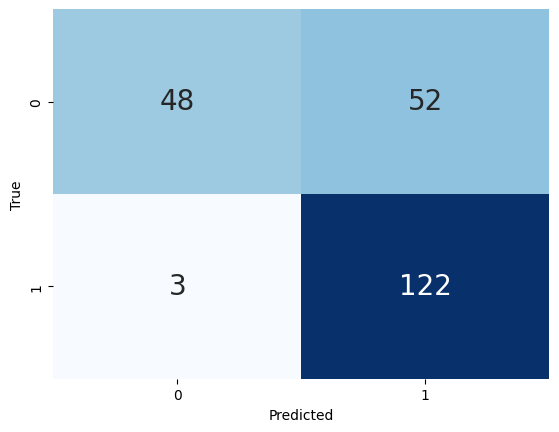

In [ ]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.2))

Precision: 0.8560606060606061
Recall: 0.904


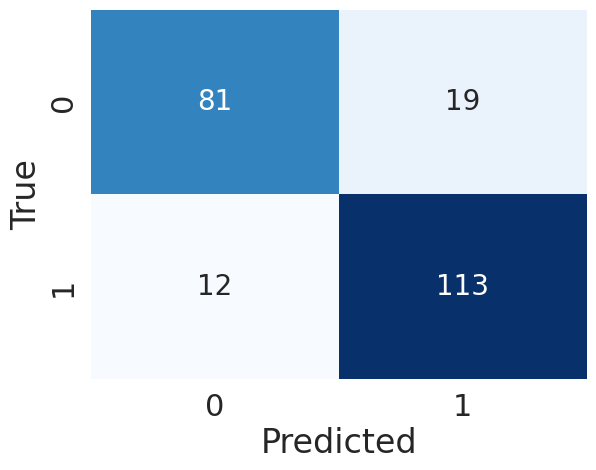

In [ ]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.4))

Precision: 0.908256880733945
Recall: 0.792


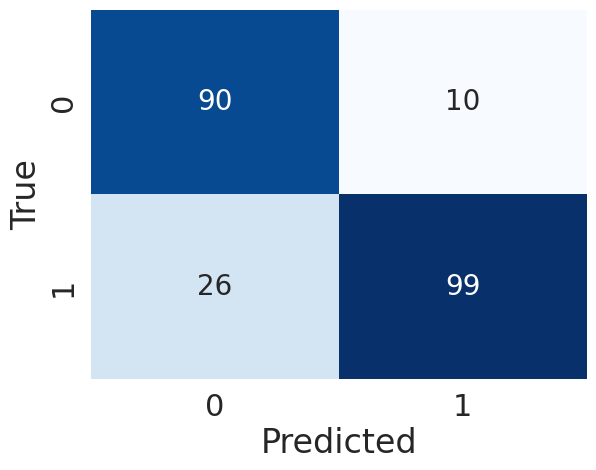

In [ ]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.6))

Precision: 0.9042553191489362
Recall: 0.68


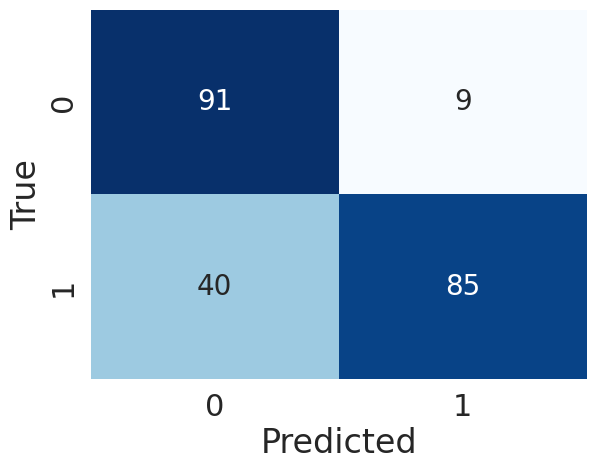

In [ ]:
show_confusion_matrix_and_print_accuracy_and_recall(df["Status_number"], predict_with_threshold(yhat_probabilities, 0.8))

In [ ]:
from sklearn.metrics import precision_recall_curve

#model = KNeighborsClassifier(n_neighbors = 30)
#model.fit(df[['Income', 'Debt']], df['Status'])
#yhat_probabilities = model.predict_proba(df[['Income', 'Debt']])
#df["Status_number"] = (df["Status"] == "Paid") * 1
precision, recall, thresholds = precision_recall_curve(df["Status"], yhat_probabilities[:, 1],
                                                       pos_label = "Paid")

precision_recall_data = pd.DataFrame({"precision" : precision[:-1], "recall": recall[:-1], "T": thresholds})
px.line(precision_recall_data, y = "precision", x = "recall", hover_name = "T", markers = True)
#plt.plot(recall, precision, '*')
#plt.xlabel("recall")
#plt.ylabel("precision")
#plt.text(recall[467], precision[467], f"T = {thresholds[467]:.2f}")
#plt.text(recall[400], precision[400], f"T = {thresholds[400]:.2f}")
#plt.text(recall[540], precision[540], f"T = {thresholds[540]:.2f}")
#plt.ylim(-0.03, 1.05)
#plt.savefig("precision_vs_recall_lm_better.png", dpi = 300, bbox_inches = "tight")
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [ ]:
class RandomGuesser():
    def predict(self, x):
        return np.random.random(len(x))

rg = RandomGuesser()
rg.predict(df[["Income", "Debt"]])

array([0.97184241, 0.83857226, 0.21049087, 0.89667714, 0.88832206,
       0.19948914, 0.61309485, 0.05432902, 0.07793639, 0.34829317,
       0.42005307, 0.3008396 , 0.00509296, 0.3697893 , 0.81286452,
       0.50971841, 0.53759432, 0.21163917, 0.51586525, 0.05791078,
       0.66482611, 0.47915651, 0.48148676, 0.30561288, 0.10762619,
       0.00681265, 0.05194658, 0.19568687, 0.43426018, 0.30986635,
       0.45389946, 0.20680848, 0.60126816, 0.46499743, 0.1060478 ,
       0.34295198, 0.92451318, 0.149314  , 0.3308678 , 0.87043618,
       0.57382624, 0.95282015, 0.82390288, 0.32815424, 0.06934812,
       0.89662959, 0.7462548 , 0.88834093, 0.65978377, 0.63791319,
       0.92073506, 0.21883554, 0.21174608, 0.70357973, 0.7458668 ,
       0.16395562, 0.64157708, 0.28483702, 0.87099735, 0.70301754,
       0.03495772, 0.85978929, 0.48510495, 0.14977439, 0.24410296,
       0.72513436, 0.09605741, 0.55637116, 0.36570803, 0.53182762,
       0.31319139, 0.68962542, 0.89756108, 0.86277488, 0.74722

In [ ]:
precision, recall, thresholds = precision_recall_curve(df["Status"], rg.predict(df[["Income", "Debt"]]),
                                                       pos_label = "Paid")

precision_recall_data = pd.DataFrame({"precision" : precision[:-1], "recall": recall[:-1], "T": thresholds})
px.line(precision_recall_data, y = "precision", x = "recall", hover_name = "T", markers = True)

## Nearest Neighbors for Regression

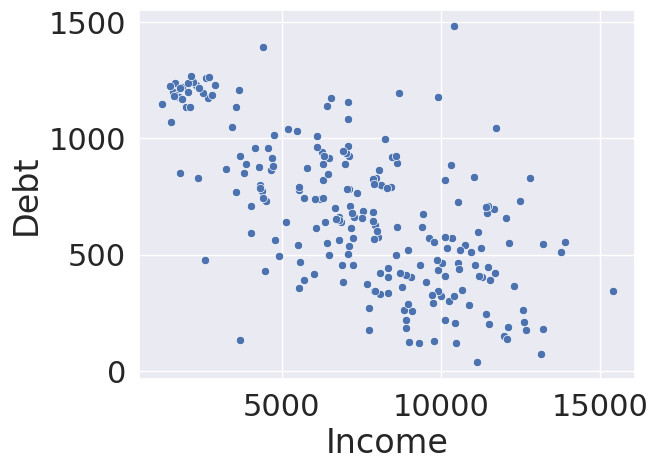

In [ ]:
sns.scatterplot(data=df, x="Income", y="Debt")
fig = plt.gcf()
fig.savefig("debt_vs_income.png", dpi=300, bbox_inches = "tight")

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
rmodel = KNeighborsRegressor(n_neighbors = 1)
rmodel.fit(df[["Income"]], df["Debt"])
rmodel.predict([[15800]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



array([343.56])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



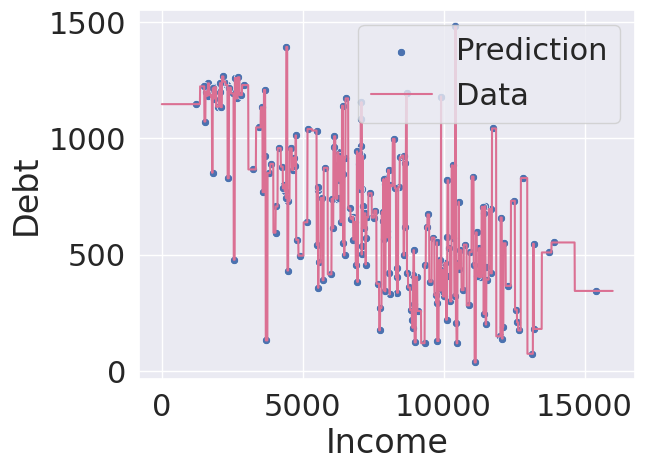

In [ ]:
income_values = np.linspace(0, 16000, 2000)
sns.scatterplot(data=df, x="Income", y="Debt")
sns.lineplot(x = income_values, y = rmodel.predict(income_values.reshape(-1, 1)), color="palevioletred")
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig("debt_vs_income_prediction_k1.png", dpi=300, bbox_inches = "tight")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



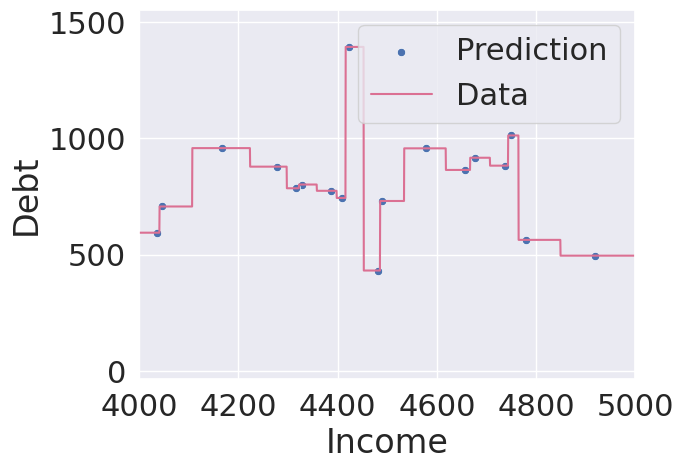

In [ ]:
income_values = np.linspace(4000, 5000, 2000)
sns.scatterplot(data=df, x="Income", y="Debt")
sns.lineplot(x = income_values, y = rmodel.predict(income_values.reshape(-1, 1)), color="palevioletred")
plt.gca().set_xlim(4000, 5000)
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig("debt_vs_income_prediction_k1_zoomed.png", dpi=300, bbox_inches = "tight")

In [ ]:
rmodel50 = KNeighborsRegressor(n_neighbors = 50)
rmodel50.fit(df[["Income"]], df["Debt"])

KNeighborsRegressor(n_neighbors=50)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but KNeighborsRegressor was fitted with feature names



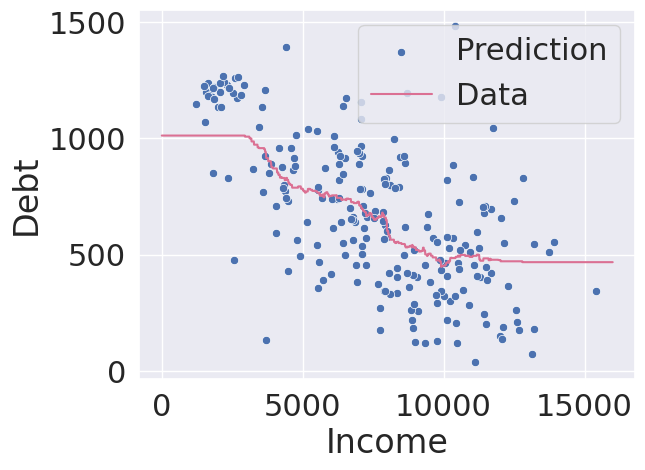

In [ ]:
income_values = np.linspace(0, 16000, 2000)
sns.scatterplot(data=df, x="Income", y="Debt")
sns.lineplot(x = income_values, y = rmodel50.predict(income_values.reshape(-1, 1)), color="palevioletred")
plt.legend(['Prediction', 'Data'])
fig = plt.gcf()
fig.savefig("debt_vs_income_prediction_k50.png", dpi=300, bbox_inches = "tight")